In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import math
import csv
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

with open('/home/vikmachine/epilepsy_rawData/epilepsy/sz8_ict.dat','r') as f:
    next(f) # skip first row
    df = pd.DataFrame(l.rstrip().split() for l in f)
with open('/home/vikmachine/epilepsy_rawData/epilepsy/sz8_pre.dat','r') as f:
    next(f) # skip first row
    dff = pd.DataFrame(l.rstrip().split() for l in f)
df.head()
df = df.T
print(df)

                0              1             2             3            4   \
0      610.0515137    457.9885254    86.3789749   143.9649658   60.2853279   
1      595.6550293    451.6900635    74.6818237   131.3680267   45.8888321   
2      597.4545898    459.7880859    80.9802933   132.2678070   48.5881729   
3      595.6550293    463.3872070    82.7798538   136.7667084   53.0870781   
4      604.6528320    480.4830627    98.0761261   150.2634277   68.3833542   
5      615.4501953    495.7793274   107.0739365   156.5618896   79.1807251   
6      611.8510742    492.1802063    98.9759064   150.2634277   70.1829147   
7      622.6484375    502.9775696   107.9737167   154.7623291   75.5816040   
8      624.4479980    505.6769104   107.9737167   152.9627686   80.0805054   
9      613.6506348    495.7793274    97.1763458   143.0651855   74.6818237   
10     613.6506348    499.3784485    98.9759064   146.6643066   80.9802933   
11     619.0493164    503.8773499   101.6752548   152.0629883   

In [2]:
df = df.convert_objects(convert_numeric=True)

/home/vikmachine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.05, 'Correlation Matrix For A patient during seizures')

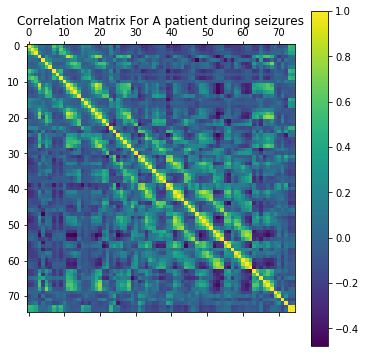

In [3]:
    AdjMatrix = df.corr(method='pearson')
    aveMatrix = AdjMatrix.values[np.triu_indices_from(AdjMatrix.values,1)].mean()
    
#     print(AdjMatrix)
    f = plt.figure(figsize=(6, 6))
    plt.matshow(AdjMatrix, fignum=f.number)
    cb = plt.colorbar()
    plt.title("Correlation Matrix For A patient during seizures", fontsize=12)
    #plt.show()

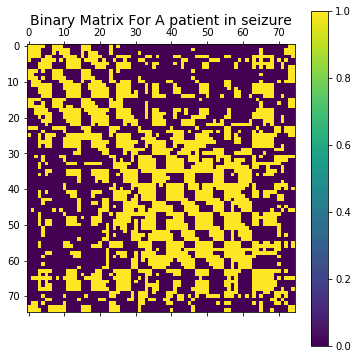

In [4]:
    for i in list(AdjMatrix.columns):
        for j in list(AdjMatrix.columns):
            if AdjMatrix.loc[i,j] <= aveMatrix:
                AdjMatrix.loc[i,j] = 0
            else:
                AdjMatrix.loc[i,j] = 1
    
    f = plt.figure(figsize=(6, 6))
    plt.matshow(AdjMatrix, fignum=f.number)
    cb = plt.colorbar()
    plt.title("Binary Matrix For A patient in seizure", fontsize=14)
    plt.savefig('ADM_InSeizure.png')

/home/vikmachine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


              0           1           2           3           4           5   \
0     307.725098  117.871307  215.047653  101.675255   76.481384  159.261230   
1     305.025757  116.071747  208.749191  104.374596   55.786423  154.762329   
2     291.529053  110.673065  197.951813   98.076126   28.792992  136.766708   
3     280.731659  106.174156  190.753571   90.877884   13.496715  110.673065   
4     269.934296  105.274376  189.853790   93.577225    9.897591   98.975906   
5     265.435394  109.773285  191.653351  101.675255    8.997810  109.773285   
6     273.533417  112.472626  188.054230  110.673065    8.098029  125.069557   
7     273.533417  111.572846  177.256851  114.272186   11.697153  129.568466   
8     251.938675  103.474815  169.158829  107.073937   19.795181  125.969337   
9     217.747009   93.577225  161.960587   99.875694   27.893211  134.067368   
10    201.550949   98.076126  164.659927  103.474815   43.189487  159.261230   
11    204.250290  105.274376  176.357071

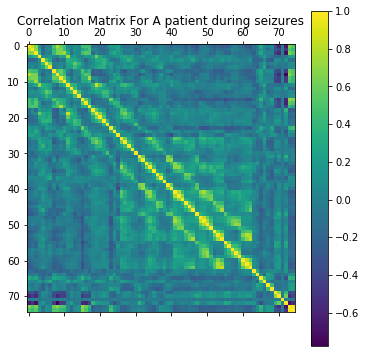

In [5]:
    df=dff
    df = df.T
    df = df.convert_objects(convert_numeric=True)
    print(df)
    AdjMatrix = df.corr(method='pearson')
    aveMatrix = AdjMatrix.values[np.triu_indices_from(AdjMatrix.values,1)].mean()
    
#     print(AdjMatrix)
    f = plt.figure(figsize=(6, 6))
    plt.matshow(AdjMatrix, fignum=f.number)
    cb = plt.colorbar()
    plt.title("Correlation Matrix For A patient during seizures", fontsize=12)
    plt.show()

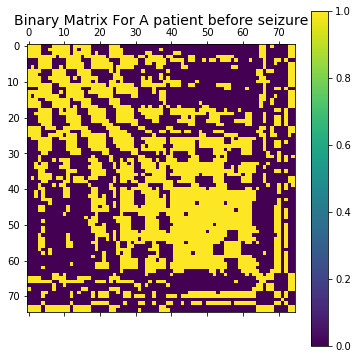

In [6]:
    for i in list(AdjMatrix.columns):
        for j in list(AdjMatrix.columns):
            if AdjMatrix.loc[i,j] <= aveMatrix:
                AdjMatrix.loc[i,j] = 0
            else:
                AdjMatrix.loc[i,j] = 1
    
    f = plt.figure(figsize=(6, 6))
    plt.matshow(AdjMatrix, fignum=f.number)
    cb = plt.colorbar()
    plt.title("Binary Matrix For A patient before seizure", fontsize=14)
    plt.savefig('ADM_BeforeSeizure.png')